### Model Info

Original Researchers: **Matthew Zhu** and **Yinan Zhao**

The research done to create this model can be found [here](https://github.com/afnanrahman/EAFP/blob/main/notebooks/logistic_regression.ipynb)


#### Logistic Regression Results Summary

The Logistic Regression base model had an accuracy of 70.68%

Hyperparameter Tuning on the feature selected model 
*  with Random Search: ~91.89%

## Imports and Data

In [ ]:
# Standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns 

# Preprocessing
from sklearn.preprocessing import StandardScaler

#Model
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score
%matplotlib inline

# Clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from matplotlib.lines import Line2D  # for legend handle
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")
import pickle 

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/afnanrahman/EAFP/main/data/one_hot_encoded_smote_data.csv")
data

,age,daily_rate,distance_from_home,education,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,...,job_role_research_scientist,job_role_sales_executive,job_role_sales_representative,marital_status_divorced,marital_status_married,marital_status_single,over_time_no,over_time_yes,attrition,rate_avg
0,41,1102,1,2,1,2,94,3,2,4,...,0,1,0,0,0,1,0,1,1,6891.67
1,49,279,8,1,2,3,61,2,2,2,...,1,0,0,0,1,0,1,0,0,8415.67
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,0,0,0,1,0,1,1,1287.00
3,33,1392,3,4,5,4,56,3,1,3,...,1,0,0,0,1,0,0,1,0,8202.33
4,27,591,2,1,7,1,40,3,1,2,...,0,0,0,0,1,0,1,0,0,5754.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,35,326,7,1,1882,2,47,3,1,2,...,0,0,0,0,0,0,1,0,1,1524.67
2462,33,1319,18,2,417,1,67,3,1,3,...,0,0,0,0,0,1,0,1,1,2014.33
2463,31,381,25,4,837,1,83,2,1,3,...,0,0,0,0,0,0,0,0,1,6180.00
2464,41,480,23,2,559,2,79,2,2,2,...,0,1,0,0,1,0,0,0,1,2166.67


## LR Model Training:

### Base Model: Accuracy = 70.68%

In [ ]:
base_no_attr = data.drop(['attrition'], axis=1)
X = base_no_attr
Y = data['attrition']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, Y_train)

lr_Y_pred = lr.predict(X_test)
lr.score(X_test, Y_test)

0.7067567567567568

### Hyperparameter Tuning RandomSearchCV: Accuracy = 91.89%

In [ ]:
# add here
i_no_attr = data.drop(['attrition', 'monthly_rate', 'hourly_rate','daily_rate'], axis=1)
scaler = RobustScaler()
X = scaler.fit_transform(i_no_attr)
Y = data['attrition']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

best_params_hyperparameter = {'solver': 'saga', 'penalty': 'none', 'C': 0}

lr = LogisticRegression(**best_params_hyperparameter, random_state = 42, max_iter=10000)
lr.fit(X_train, Y_train)

lr_Y_pred = lr.predict(X_test)
lr.score(X_test, Y_test)

0.918918918918919

### Creating the pickle file

In [ ]:
import torch
model_save_name = 'final_lr_model.sav'
path = "/content/drive/MyDrive/Colab_Notebooks/models/" 
torch.save(lr, path + model_save_name)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab_Notebooks/models/'
filename = 'final_lr_model.sav'

In [ ]:
# pickle the model
import pickle 
pickle_out = open(path+ filename, "wb")
pickle.dump(lr, pickle_out)

In [ ]:
# load the model
import os

# load the model from drive 
path_to_embed = os.path.join(path, filename)
loaded_model = pickle.load(open(path_to_embed, "rb"))

## Clustering

In [ ]:
log_all_preds = lr.predict(X)
preds_df = pd.DataFrame({'predict_attrition': log_all_preds})

data_copy = i_no_attr.copy() 

pred_attr = pd.concat([data_copy, preds_df], axis=1)
no_attr = pred_attr[pred_attr['predict_attrition'] == 1]
no_attr

,age,distance_from_home,education,employee_number,environment_satisfaction,job_involvement,job_level,job_satisfaction,num_companies_worked,percent_salary_hike,...,job_role_research_scientist,job_role_sales_executive,job_role_sales_representative,marital_status_divorced,marital_status_married,marital_status_single,over_time_no,over_time_yes,rate_avg,predict_attrition
0,41,1,2,1,2,3,2,4,8,11,...,0,1,0,0,0,1,0,1,6891.67,1
2,37,2,2,4,4,2,1,3,6,15,...,0,0,0,0,0,1,0,1,1287.00,1
14,28,24,3,19,3,2,1,3,5,14,...,0,0,0,0,0,1,0,1,4366.67,1
21,36,9,4,27,3,2,1,1,7,23,...,0,0,1,0,0,1,1,0,2762.00,1
26,32,16,1,33,2,1,1,1,1,22,...,1,0,0,0,0,1,0,1,1959.33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,35,7,1,1882,2,3,1,2,3,12,...,0,0,0,0,0,0,1,0,1524.67,1
2462,33,18,2,417,1,3,1,3,6,14,...,0,0,0,0,0,1,0,1,2014.33,1
2463,31,25,4,837,1,2,1,3,1,22,...,0,0,0,0,0,0,0,0,6180.00,1
2464,41,23,2,559,2,2,2,2,2,12,...,0,1,0,0,1,0,0,0,2166.67,1


### K-Means, k= 3

In [ ]:
clustering_kmeans3 = KMeans(init='k-means++', random_state = 42, n_clusters=3)

In [ ]:
iclustering_data= no_attr.drop("predict_attrition", axis = 1)

### TSNE for Visualization

In [ ]:
tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state= 42,perplexity= 50, n_iter=4000)

kmeans_tsne_comps = tsne.fit_transform(iclustering_data)

In [ ]:
kmeans_tsne_comps_df = pd.DataFrame(data=kmeans_tsne_comps, columns=['TSNE_1', 'TSNE_2'])
clusters_kmeans3 = clustering_kmeans3.fit_predict(iclustering_data)

kmeans_tsne_comps_df['cluster'] = clusters_kmeans3

Text(0.5, 1.0, 'Logistic Regression: T-SNE Visulization')

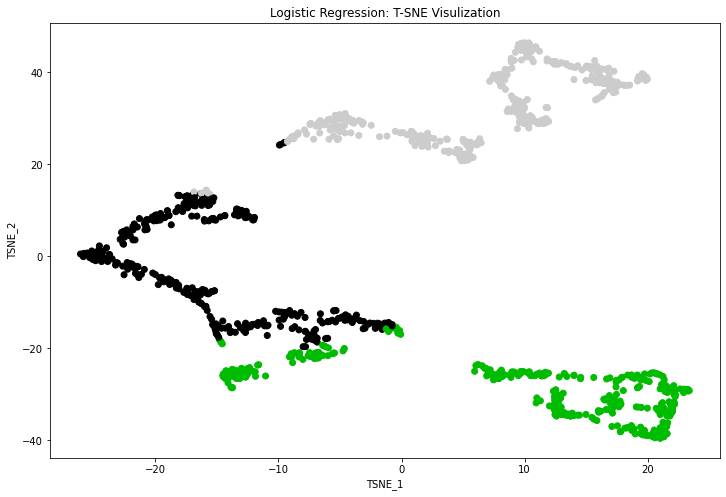

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(kmeans_tsne_comps_df['TSNE_1'],kmeans_tsne_comps_df['TSNE_2'],c=kmeans_tsne_comps_df['cluster'], cmap='nipy_spectral')

plt.xlabel('TSNE_1')
plt.ylabel('TSNE_2')
plt.title('Logistic Regression: T-SNE Visulization')



### Clustering Metric: Silhouette Score

In [ ]:
score = silhouette_score(iclustering_data, clustering_kmeans3.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)


Silhouetter Score: 0.509


### Cluster Descriptions

### Cluster Interpretation: Visualizations

In [ ]:
# Interpreting Clusters of leaving employees (3 clusters, KModes)
import random
random.seed(42)

lst=[]

curr_cluster = clustering_kmeans3.fit_predict(no_attr)

df_copy = no_attr.copy()
for col in df_copy.columns:
  lst.append(col)
df_copy['cluster'] = curr_cluster


cluster0 = df_copy[df_copy['cluster'] == 0]
cluster1 = df_copy[df_copy['cluster'] == 1]
cluster2 = df_copy[df_copy['cluster'] == 2]


df0 = cluster0[lst].mean(axis=0)[:1]
df1 = cluster1[lst].mean(axis=0)[:1]
df2 = cluster2[lst].mean(axis=0)[:1]

X = lst

c0_vals=cluster0.values.tolist()[0]
c0_vals.pop()   # pop off the added "Cluster" feature
c1_vals=cluster1.values.tolist()[0]
c1_vals.pop()   # pop off the added "Cluster" feature
c2_vals=cluster2.values.tolist()[0]
c2_vals.pop()   # pop off the added "Cluster" feature

clus0 = c0_vals
clus1 = c1_vals
clus2 = c2_vals
  
X_axis = np.arange(len(X))

In [ ]:
cluster0.columns

Index(['age', 'distance_from_home', 'education', 'employee_number',
       'environment_satisfaction', 'job_involvement', 'job_level',
       'job_satisfaction', 'num_companies_worked', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role', 'years_with_curr_manager',
       'business_travel_non-_travel', 'business_travel_travel_frequently',
       'business_travel_travel_rarely', 'department_human_resources',
       'department_research_&_development', 'department_sales',
       'education_field_human_resources', 'education_field_life_sciences',
       'education_field_marketing', 'education_field_medical',
       'education_field_other', 'education_field_technical_degree',
       'gender_female', 'gender_male', 'job_role_healthcare_representative',
       'job_role_human_resources', 'job_role_laboratory_techn

In [ ]:
all_features = list(cluster0.columns)

df0 = cluster0[all_features].mode(axis=0)[:1]
df1 = cluster1[all_features].mode(axis=0)[:1]
df2 = cluster2[all_features].mode(axis=0)[:1]

X = all_features

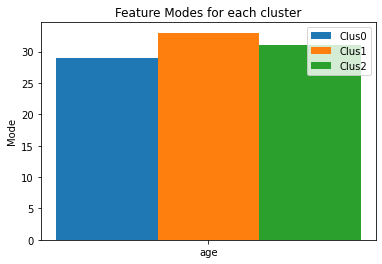

In [ ]:
all_features = list(cluster0.columns)

df0 = cluster0[all_features].mode(axis=0)[:1]
df1 = cluster1[all_features].mode(axis=0)[:1]
df2 = cluster2[all_features].mode(axis=0)[:1]

X = all_features

c0_vals_age = list(df0["age"])
c1_vals_age = list(df1["age"])
c2_vals_age = list(df2["age"])

X_axis = np.arange(len(X[0:1]))

plt.bar(X_axis - 0.2, c0_vals_age, 0.2, label = 'Clus0')
plt.bar(X_axis, c1_vals_age, 0.2, label = 'Clus1')
plt.bar(X_axis + 0.2, c2_vals_age, 0.2, label = 'Clus2')

plt.xticks(X_axis, ["age"])
plt.ylabel("Mode")
plt.title("Feature Modes for each cluster")
plt.legend(loc=1, prop={'size': 10})
plt.show()

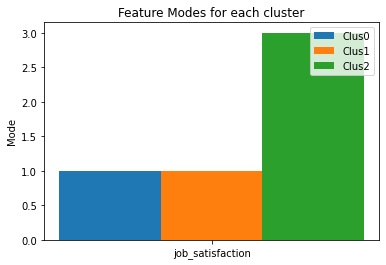

In [ ]:
all_features = list(cluster0.columns)

df0 = cluster0[all_features].mode(axis=0)[:1]
df1 = cluster1[all_features].mode(axis=0)[:1]
df2 = cluster2[all_features].mode(axis=0)[:1]

X = all_features

c0_vals = list(df0["job_satisfaction"])
c1_vals = list(df1["job_satisfaction"])
c2_vals = list(df2["job_satisfaction"])

X_axis = np.arange(len(X[0:1]))

plt.bar(X_axis - 0.2, c0_vals, 0.2, label = 'Clus0')
plt.bar(X_axis, c1_vals, 0.2, label = 'Clus1')
plt.bar(X_axis + 0.2, c2_vals, 0.2, label = 'Clus2')

plt.xticks(X_axis, ["job_satisfaction"])
plt.ylabel("Mode")
plt.title("Feature Modes for each cluster")
plt.legend(loc=1, prop={'size': 10})
plt.show()

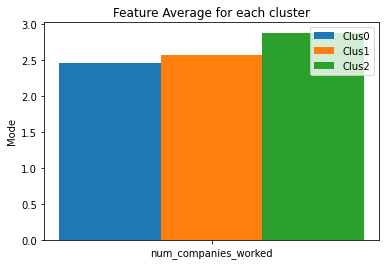

In [ ]:
all_features = list(cluster0.columns)

df0 = cluster0[all_features].mean(axis=0)
df1 = cluster1[all_features].mean(axis=0)
df2 = cluster2[all_features].mean(axis=0)

X = all_features
c0_vals = (df0["num_companies_worked"])
c1_vals = (df1["num_companies_worked"])
c2_vals = (df2["num_companies_worked"])

X_axis = np.arange(len(X[0:1]))

plt.bar(X_axis - 0.2, c0_vals, 0.2, label = 'Clus0')
plt.bar(X_axis, c1_vals, 0.2, label = 'Clus1')
plt.bar(X_axis + 0.2, c2_vals, 0.2, label = 'Clus2')

plt.xticks(X_axis, ["num_companies_worked"])
plt.ylabel("Mode")
plt.title("Feature Average for each cluster")
plt.legend(loc=1, prop={'size': 10})
plt.show()

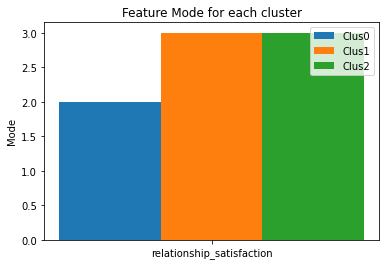

In [ ]:
all_features = list(cluster0.columns)

df0 = cluster0[all_features].mode(axis=0)[:1]
df1 = cluster1[all_features].mode(axis=0)[:1]
df2 = cluster2[all_features].mode(axis=0)[:1]

X = all_features

c0_vals = list(df0["relationship_satisfaction"])
c1_vals = list(df1["relationship_satisfaction"])
c2_vals = list(df2["relationship_satisfaction"])

X_axis = np.arange(len(X[0:1]))

plt.bar(X_axis - 0.2, c0_vals, 0.2, label = 'Clus0')
plt.bar(X_axis, c1_vals, 0.2, label = 'Clus1')
plt.bar(X_axis + 0.2, c2_vals, 0.2, label = 'Clus2')

plt.xticks(X_axis, ["relationship_satisfaction"])
plt.ylabel("Mode")
plt.title("Feature Mode for each cluster")
plt.legend(loc=1, prop={'size': 10})
plt.show()

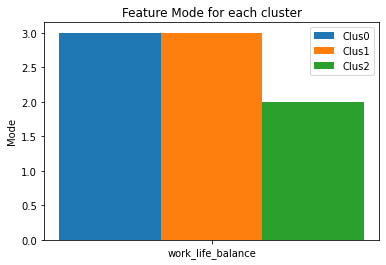

In [ ]:
all_features = list(cluster0.columns)

df0 = cluster0[all_features].mode(axis=0)[:1]
df1 = cluster1[all_features].mode(axis=0)[:1]
df2 = cluster2[all_features].mode(axis=0)[:1]

X = all_features

c0_vals = list(df0["work_life_balance"])
c1_vals = list(df1["work_life_balance"])
c2_vals = list(df2["work_life_balance"])

X_axis = np.arange(len(X[0:1]))

plt.bar(X_axis - 0.2, c0_vals, 0.2, label = 'Clus0')
plt.bar(X_axis, c1_vals, 0.2, label = 'Clus1')
plt.bar(X_axis + 0.2, c2_vals, 0.2, label = 'Clus2')

plt.xticks(X_axis, ["work_life_balance"])
plt.ylabel("Mode")
plt.title("Feature Mode for each cluster")
plt.legend(loc=1, prop={'size': 10})
plt.show()

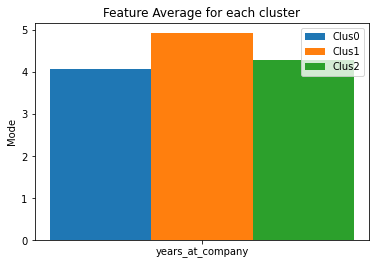

In [ ]:
all_features = list(cluster0.columns)

df0 = cluster0[all_features].mean(axis=0)
df1 = cluster1[all_features].mean(axis=0)
df2 = cluster2[all_features].mean(axis=0)

X = all_features
c0_vals = (df0["years_at_company"])
c1_vals = (df1["years_at_company"])
c2_vals = (df2["years_at_company"])

X_axis = np.arange(len(X[0:1]))

plt.bar(X_axis - 0.2, c0_vals, 0.2, label = 'Clus0')
plt.bar(X_axis, c1_vals, 0.2, label = 'Clus1')
plt.bar(X_axis + 0.2, c2_vals, 0.2, label = 'Clus2')

plt.xticks(X_axis, ["years_at_company"])
plt.ylabel("Mode")
plt.title("Feature Average for each cluster")
plt.legend(loc=1, prop={'size': 10})
plt.show()

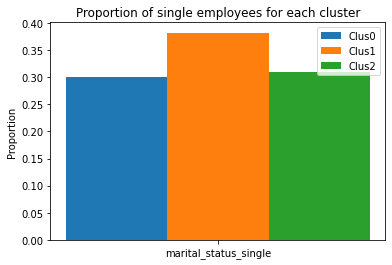

In [ ]:
all_features = list(cluster0.columns)

df0 = cluster0[all_features].mean(axis=0)
df1 = cluster1[all_features].mean(axis=0)
df2 = cluster2[all_features].mean(axis=0)

X = all_features

c0_vals = (df0["marital_status_single"])
c1_vals = (df1["marital_status_single"])
c2_vals = (df2["marital_status_single"])

X_axis = np.arange(len(X[0:1]))

plt.bar(X_axis - 0.2, c0_vals, 0.2, label = 'Clus0')
plt.bar(X_axis, c1_vals, 0.2, label = 'Clus1')
plt.bar(X_axis + 0.2, c2_vals, 0.2, label = 'Clus2')

plt.xticks(X_axis, ["marital_status_single"])
plt.ylabel("Proportion")
plt.title("Proportion of single employees for each cluster")
plt.legend(loc=1, prop={'size': 10})
plt.show()

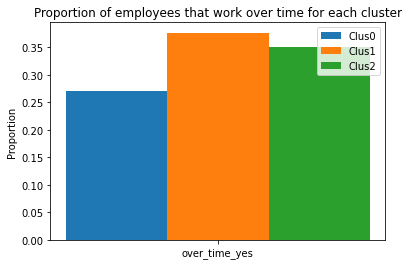

In [ ]:
all_features = list(cluster0.columns)

df0 = cluster0[all_features].mean(axis=0)
df1 = cluster1[all_features].mean(axis=0)
df2 = cluster2[all_features].mean(axis=0)

X = all_features

c0_vals = (df0["over_time_yes"])
c1_vals = (df1["over_time_yes"])
c2_vals = (df2["over_time_yes"])

X_axis = np.arange(len(X[0:1]))

plt.bar(X_axis - 0.2, c0_vals, 0.2, label = 'Clus0')
plt.bar(X_axis, c1_vals, 0.2, label = 'Clus1')
plt.bar(X_axis + 0.2, c2_vals, 0.2, label = 'Clus2')

plt.xticks(X_axis, ["over_time_yes"])
plt.ylabel("Proportion")
plt.title("Proportion of employees that work over time for each cluster")
plt.legend(loc=1, prop={'size': 10})
plt.show()

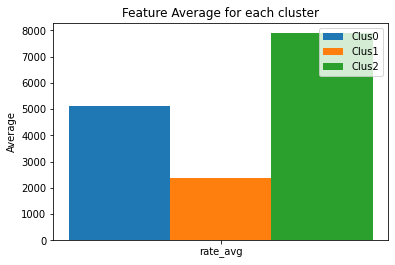

In [ ]:
all_features = list(cluster0.columns)

df0 = cluster0[all_features].mean(axis=0)
df1 = cluster1[all_features].mean(axis=0)
df2 = cluster2[all_features].mean(axis=0)

X = all_features

c0_vals = (df0["rate_avg"])
c1_vals = (df1["rate_avg"])
c2_vals = (df2["rate_avg"])

X_axis = np.arange(len(X[0:1]))

plt.bar(X_axis - 0.2, c0_vals, 0.2, label = 'Clus0')
plt.bar(X_axis, c1_vals, 0.2, label = 'Clus1')
plt.bar(X_axis + 0.2, c2_vals, 0.2, label = 'Clus2')

plt.xticks(X_axis, ["rate_avg"])
plt.ylabel("Average")
plt.title("Feature Average for each cluster")
plt.legend(loc=1, prop={'size': 10})
plt.show()

#### Visualization Code for Website

In [ ]:
def input_to_output(cluster0, cluster1, cluster2):

  all_features = list(cluster0.columns)

  df0 = cluster0[all_features].mode(axis=0)[:1]
  df1 = cluster1[all_features].mode(axis=0)[:1]
  df2 = cluster2[all_features].mode(axis=0)[:1]


  X = all_features

  c0_vals_age = list(df0["age"])
  c1_vals_age = list(df1["age"])
  c2_vals_age = list(df2["age"])

  c0_vals_job_satisfaction = list(df0["job_satisfaction"])
  c1_vals_job_satisfaction = list(df1["job_satisfaction"])
  c2_vals_job_satisfaction = list(df2["job_satisfaction"])

  c0_vals_num_years = list(df0["years_at_company"])
  c1_vals_num_years = list(df1["years_at_company"])
  c2_vals_num_years = list(df2["years_at_company"])

  c0_vals_work_life = list(df0["work_life_balance"])
  c1_vals_work_life = list(df1["work_life_balance"])
  c2_vals_work_life = list(df2["work_life_balance"])


  X_axis = np.arange(len(X[0:1]))

  # age
  plt.subplot(2, 2, 1)
  plt.bar(X_axis - 0.2, c0_vals_age, 0.2, label = 'Clus0')
  plt.bar(X_axis, c1_vals_age, 0.2, label = 'Clus1')
  plt.bar(X_axis + 0.2, c2_vals_age, 0.2, label = 'Clus2')

  plt.xticks(X_axis, ["age"])
  plt.ylabel("Mode")
  plt.title("Feature Modes for each cluster")
  plt.legend(loc=1, prop={'size': 10})

  # job satisfaction
  plt.subplot(2, 2, 2)
  plt.bar(X_axis - 0.2, c0_vals_job_satisfaction, 0.2, label = 'Clus0')
  plt.bar(X_axis, c1_vals_job_satisfaction, 0.2, label = 'Clus1')
  plt.bar(X_axis + 0.2, c2_vals_job_satisfaction, 0.2, label = 'Clus2')

  plt.xticks(X_axis, ["job satisfaction"])
  plt.ylabel("Mode")
  plt.title("Feature Modes for each cluster")
  plt.legend(loc=1, prop={'size': 10})

  # num years at company
  plt.subplot(2, 2, 3)
  plt.bar(X_axis - 0.2, c0_vals_num_years, 0.2, label = 'Clus0')
  plt.bar(X_axis, c1_vals_num_years, 0.2, label = 'Clus1')
  plt.bar(X_axis + 0.2, c2_vals_num_years, 0.2, label = 'Clus2')

  plt.xticks(X_axis, ["num years at company"])
  plt.ylabel("Mode")
  plt.title("Feature Modes for each cluster")
  plt.legend(loc=1, prop={'size': 10})

  # work life balance
  plt.subplot(2, 2, 4)
  plt.tight_layout()
  plt.bar(X_axis - 0.2, c0_vals_work_life, 0.2, label = 'Clus0')
  plt.bar(X_axis, c1_vals_work_life, 0.2, label = 'Clus1')
  plt.bar(X_axis + 0.2, c2_vals_work_life, 0.2, label = 'Clus2')

  plt.xticks(X_axis, ["work life balance"])
  plt.ylabel("Mode")
  plt.title("Feature Modes for each cluster")
  plt.legend(loc=1, prop={'size': 10})
  plt.savefig("features_seperated_plot")

  # together
  plt.figure()
  c0_vals_all = (cluster0[["age", "job_satisfaction", "years_at_company", "work_life_balance"]].mode(axis=0)[:1].values).tolist()[0]
  c1_vals_all = (cluster1[["age", "job_satisfaction", "years_at_company", "work_life_balance"]].mode(axis=0)[:1].values).tolist()[0]
  c2_vals_all = (cluster2[["age", "job_satisfaction", "years_at_company", "work_life_balance"]].mode(axis=0)[:1].values).tolist()[0]

  X_axis = np.arange(4)

  plt.bar(X_axis - 0.1, c0_vals_all, 0.1, label = 'Clus0')
  plt.bar(X_axis, c1_vals_all, 0.1, label = 'Clus1')
  plt.bar(X_axis + 0.1, c2_vals_all, 0.1, label = 'Clus2')

  plt.xticks(X_axis, ["age", "job satisfaction", "years at company", "work-life balance"])
  plt.ylabel("Mode")
  plt.title("Feature Modes for each cluster")
  plt.legend(loc=2, prop={'size': 10})
  plt.savefig("all_features_plot")

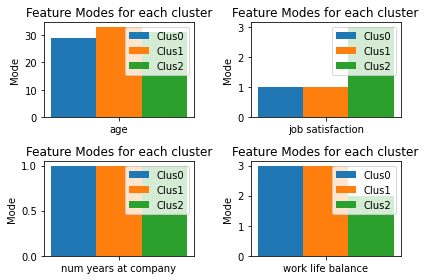

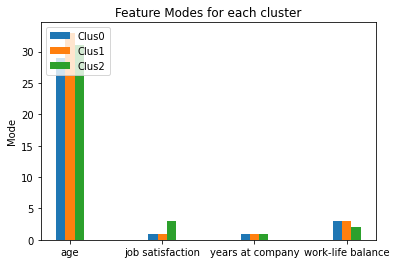

In [ ]:
input_to_output(cluster0, cluster1, cluster2)

#### For the medium article

In [ ]:
numeric = ["rate_avg", "distance_from_home",  "age", "years_in_current_role", "total_working_years", "years_at_company", "percent_salary_hike",
            "years_with_curr_manager", "attrition", "predict_attrition"]

# add the exploded variables 
exploded_variables = ['business_travel_non-_travel', 'business_travel_travel_frequently','business_travel_travel_rarely', 'department_human_resources',
       'department_research_&_development', 'department_sales', 'education_field_human_resources', 'education_field_life_sciences', 'education_field_marketing', 'education_field_medical',
       'education_field_other', 'education_field_technical_degree','gender_female', 'gender_male', 'job_role_healthcare_representative','job_role_human_resources', 'job_role_laboratory_technician',
       'job_role_manager', 'job_role_manufacturing_director', 'job_role_research_director', 'job_role_research_scientist','job_role_sales_executive', 'job_role_sales_representative',
       'marital_status_divorced', 'marital_status_married','marital_status_single', 'over_time_no', 'over_time_yes']

##### Categorical variables 

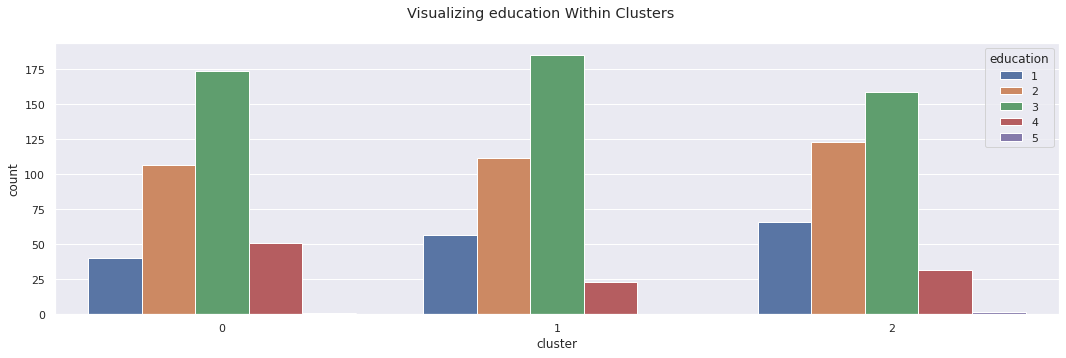

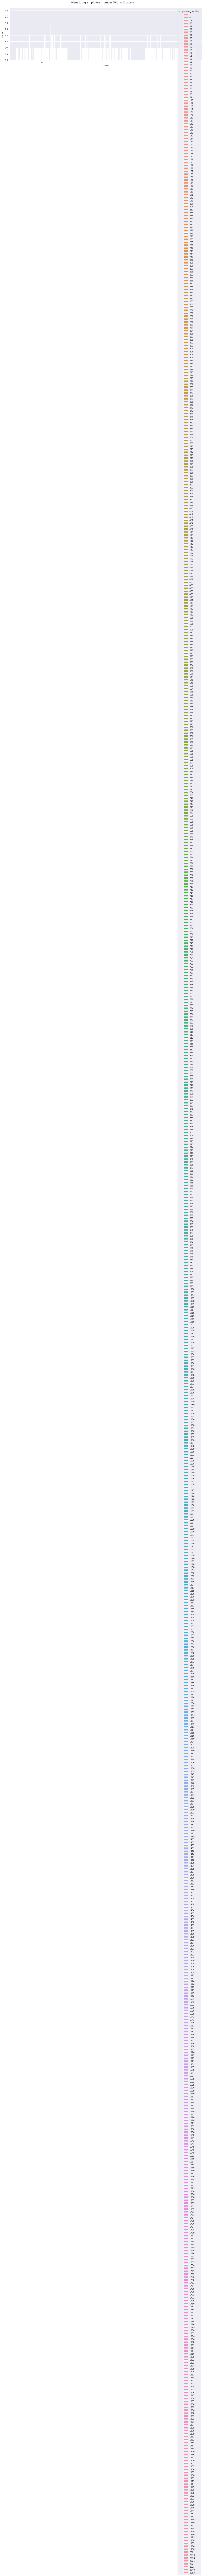

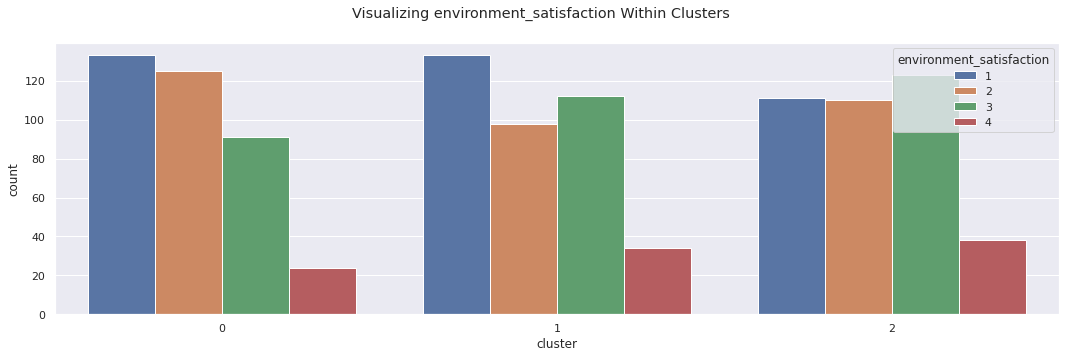

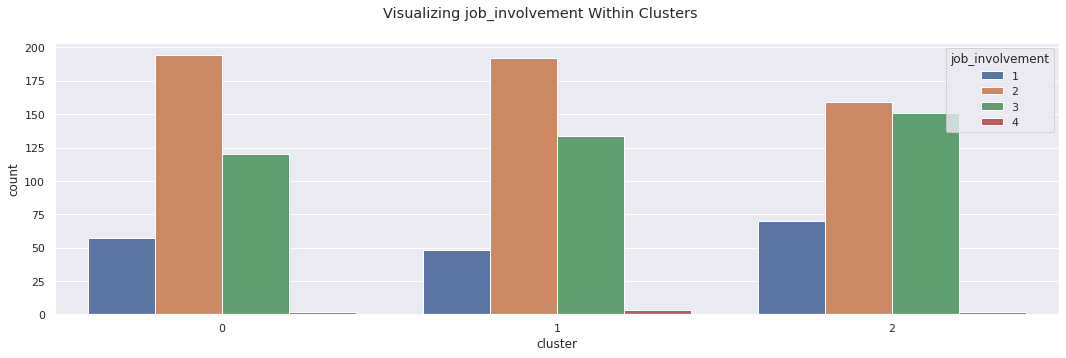

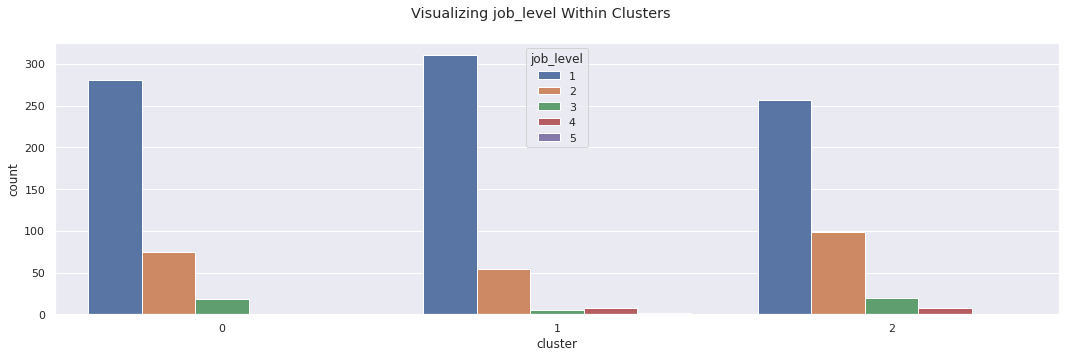

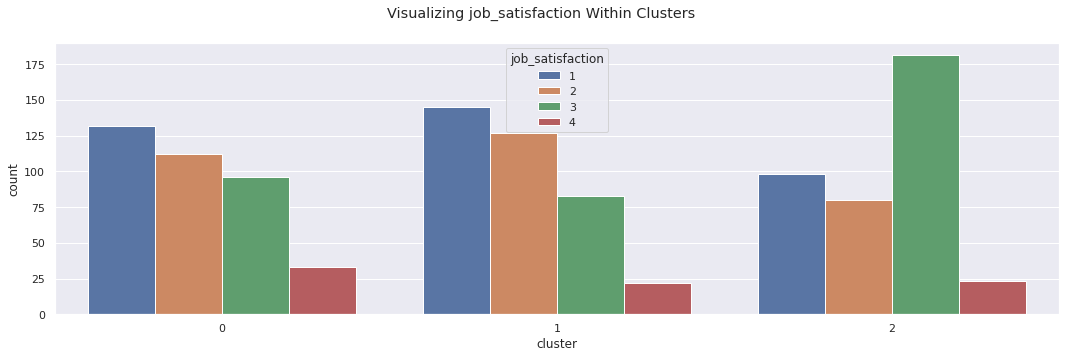

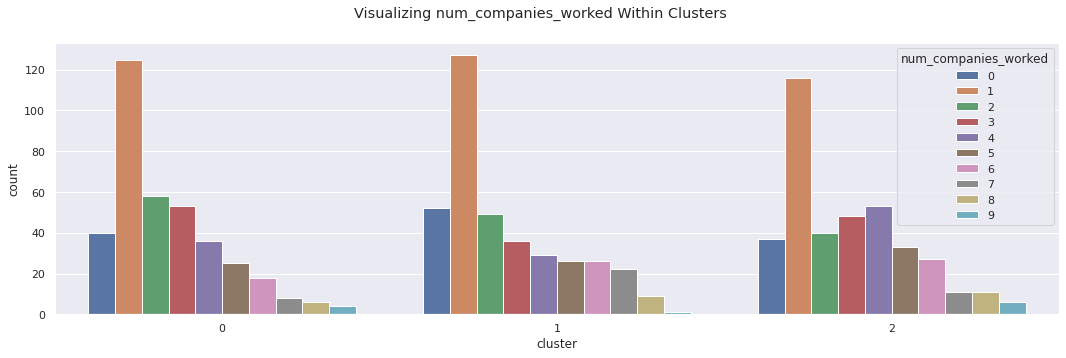

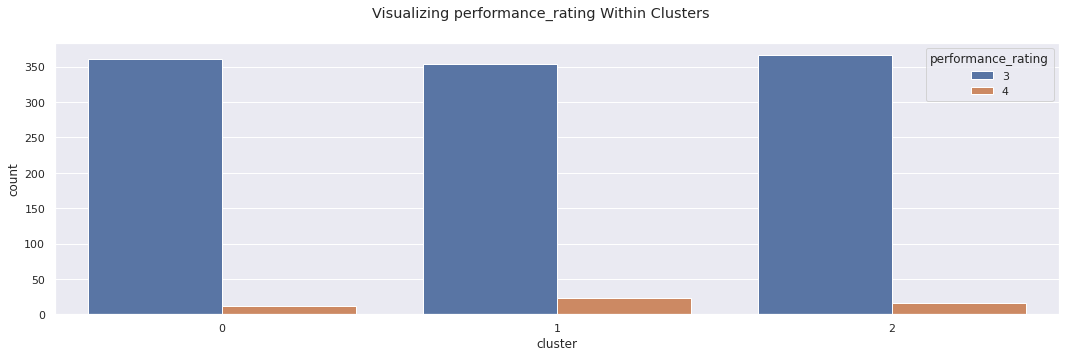

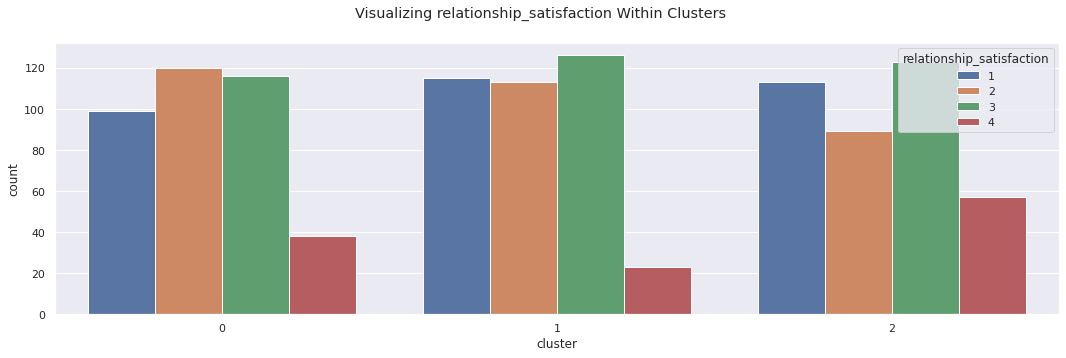

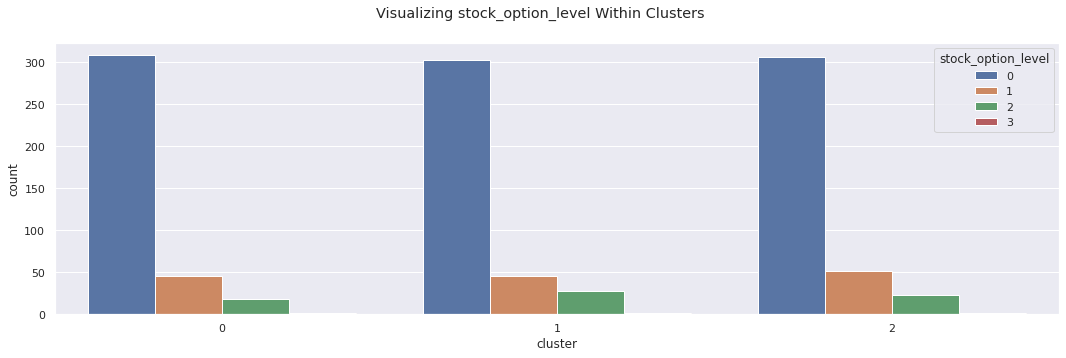

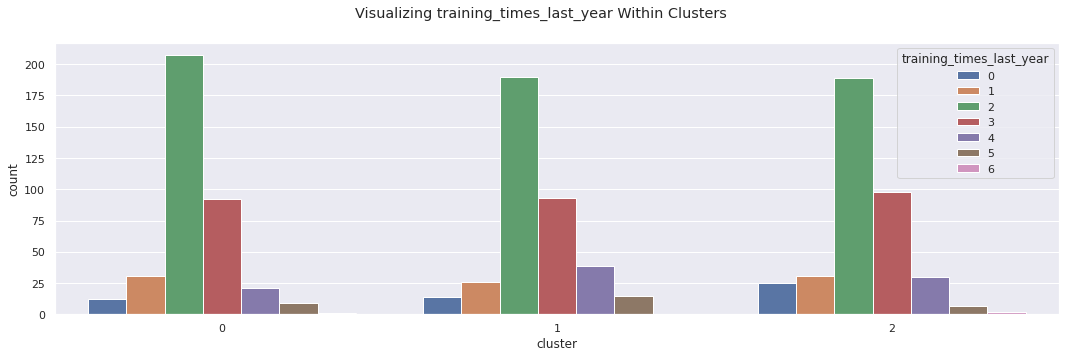

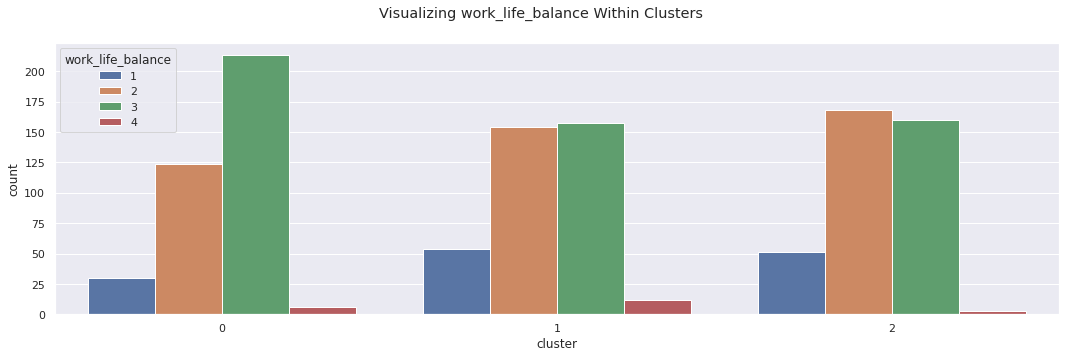

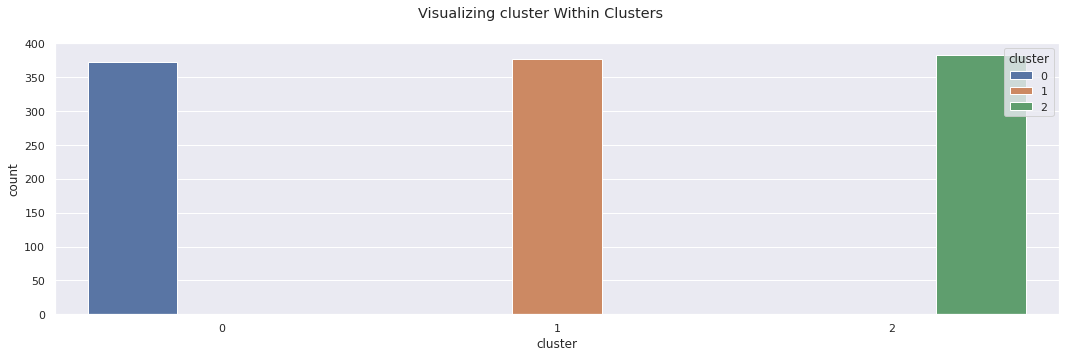

In [ ]:
sns.set_theme(style="darkgrid")


for col in df_copy:
  if col not in numeric + exploded_variables:
    fig, axs = plt.subplots(1, 1, figsize=(18,5))
    sns.countplot(x="cluster", hue=col,
        #palette=sns.color_palette("hls", num_palette),
        data=df_copy, ax=axs)
    fig.suptitle("Visualizing {} Within Clusters".format(col))
    fig.show()

##### Continuous variables 

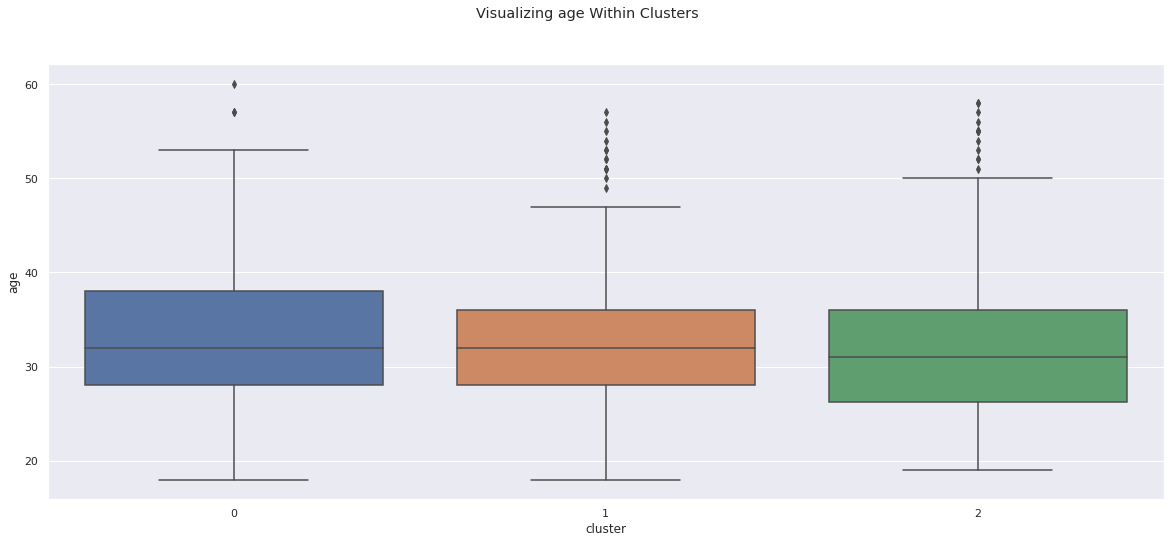

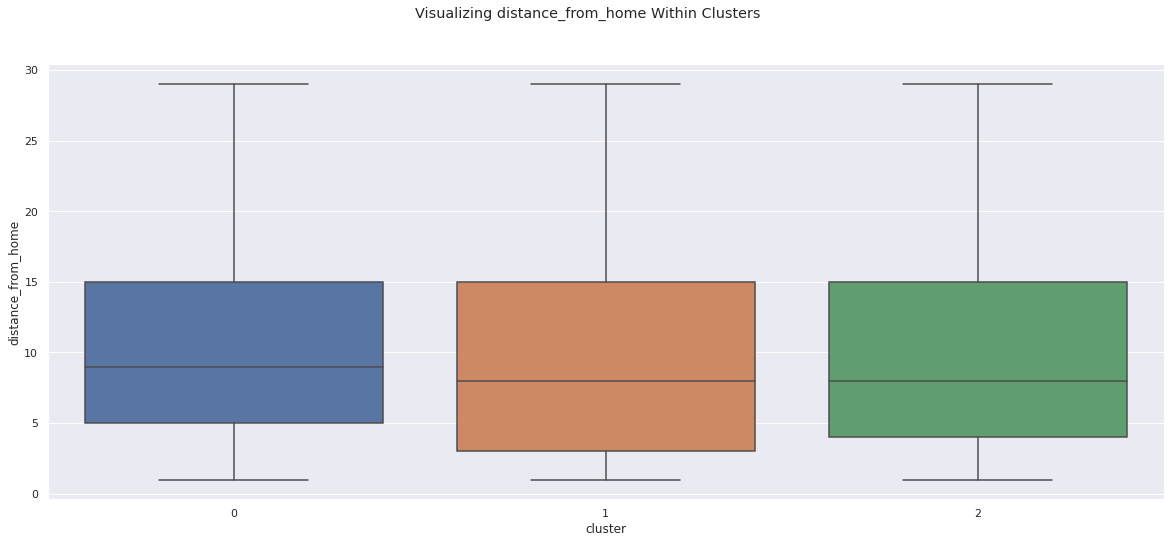

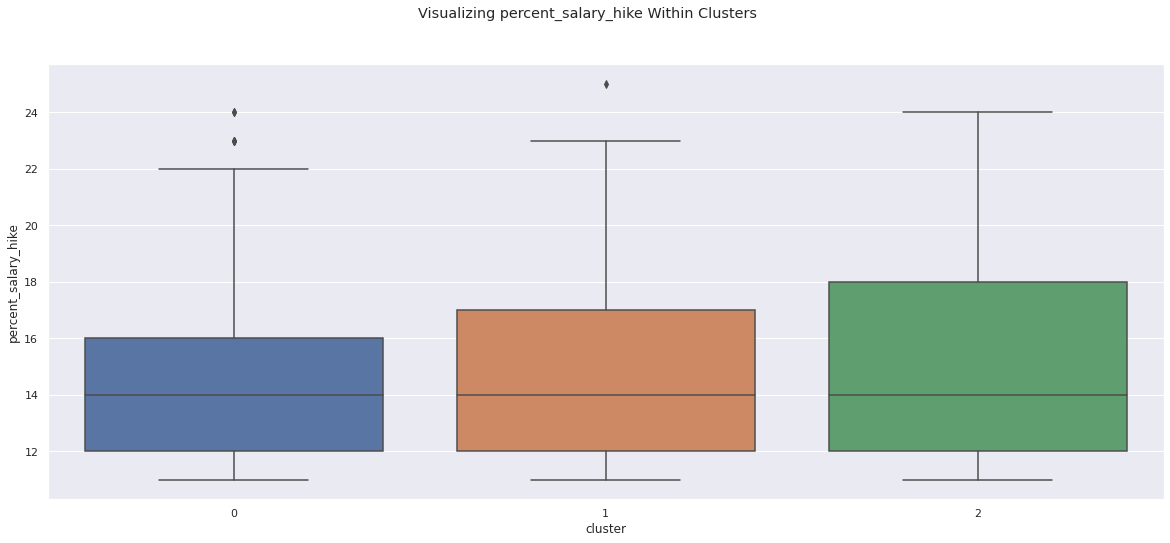

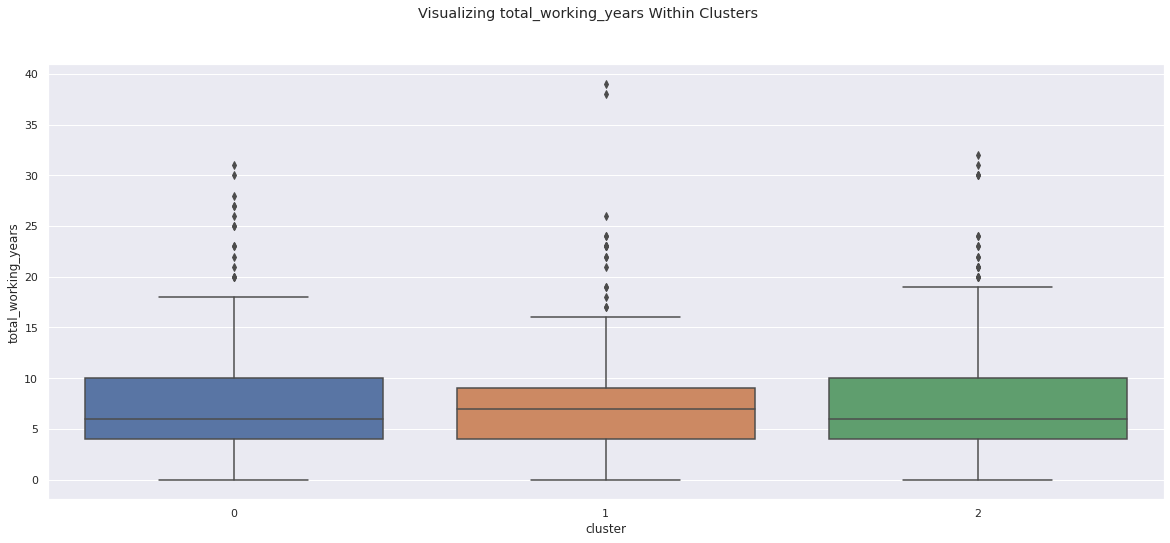

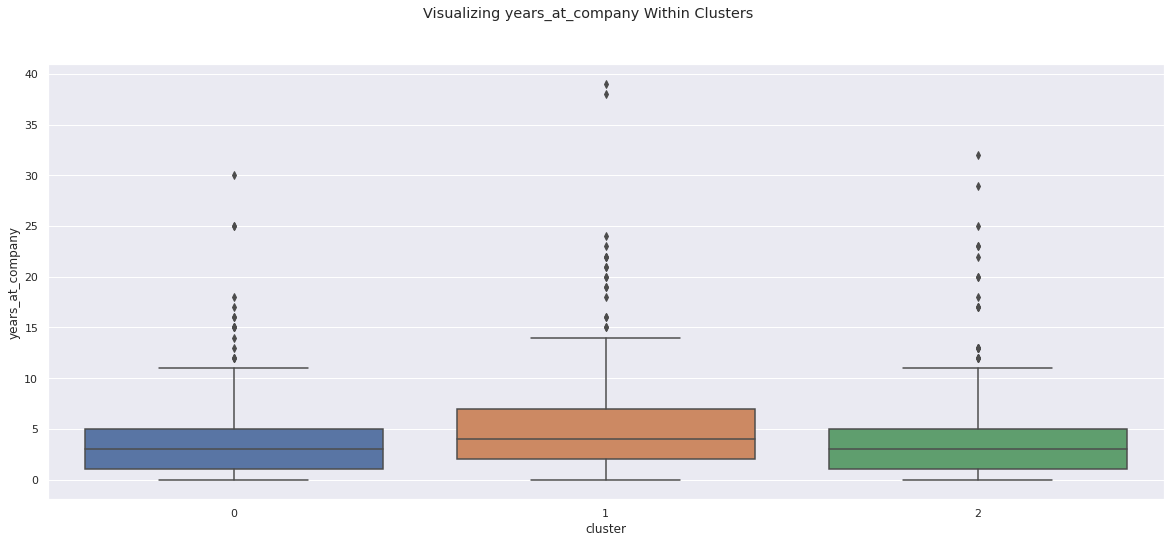

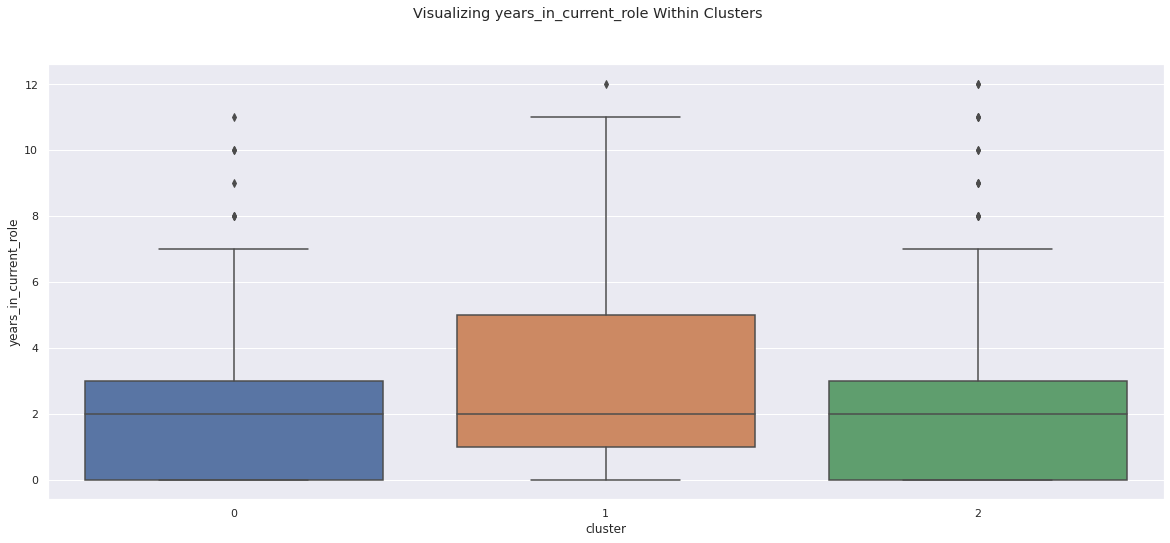

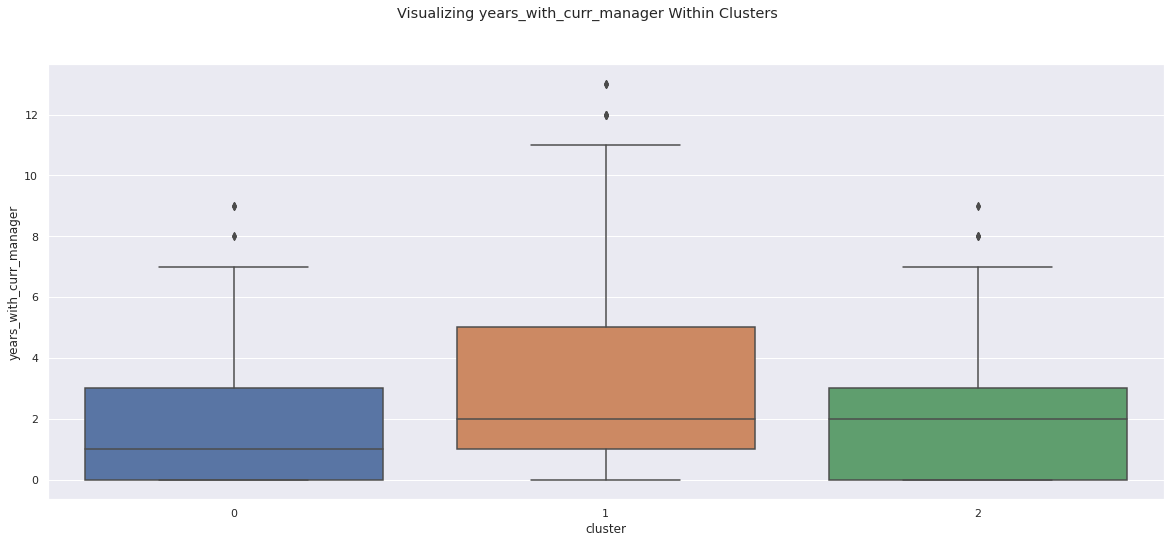

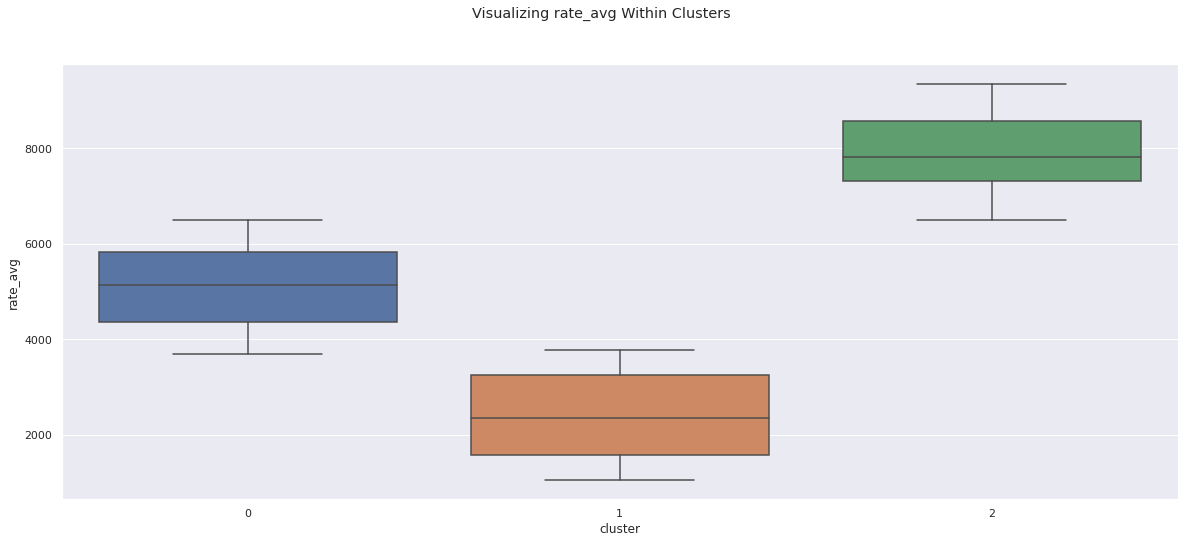

In [ ]:
continuous = ["rate_avg", "distance_from_home", "age", "years_in_current_role", "total_working_years", "years_at_company", "percent_salary_hike",
            "years_with_curr_manager"]
for col in df_copy:
  if col in continuous:
    fig, axs = plt.subplots(1, 1, figsize=(20,8))
    sns.boxplot(x="cluster", y=col,
        #palette=sns.color_palette("hls", num_palette),
        data=df_copy, ax=axs)
    fig.suptitle("Visualizing {} Within Clusters".format(col))
    fig.show()

##### Exploded variables

In [ ]:
# interpret the exploded variables 
iexdf = pd.DataFrame(df_copy[exploded_variables]).reset_index()
clusters = df_copy['cluster'].reset_index()
exdf = iexdf.merge(clusters, on = "index")
exdf = exdf.drop(['index'], axis = 1)


exdf

,business_travel_non-_travel,business_travel_travel_frequently,business_travel_travel_rarely,department_human_resources,department_research_&_development,department_sales,education_field_human_resources,education_field_life_sciences,education_field_marketing,education_field_medical,...,job_role_research_director,job_role_research_scientist,job_role_sales_executive,job_role_sales_representative,marital_status_divorced,marital_status_married,marital_status_single,over_time_no,over_time_yes,cluster
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,2
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
2,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,1,0,1
4,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1127,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,1
1129,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1130,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
exdf= exdf.groupby(['cluster']).sum().transpose()
exdf

cluster,0,1,2
business_travel_non-_travel,3,6,1
business_travel_travel_frequently,39,30,46
business_travel_travel_rarely,151,161,185
department_human_resources,3,1,2
department_research_&_development,128,142,109
department_sales,62,55,71
education_field_human_resources,3,1,1
education_field_life_sciences,77,43,61
education_field_marketing,12,13,18
education_field_medical,25,23,40


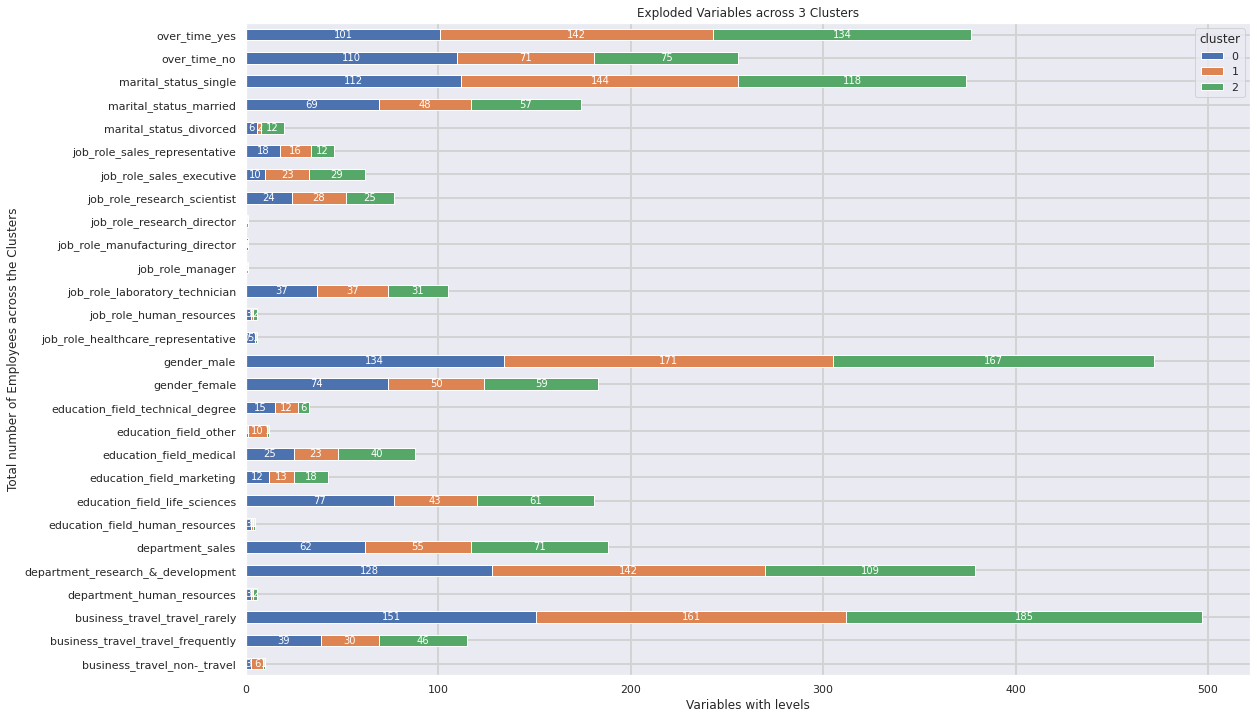

In [ ]:
rcParams['figure.figsize'] = 18,12

# create stacked bar chart
ax = exdf.plot(kind='barh', stacked=True)

# the reference code for the annotation can be found here: https://stackoverflow.com/questions/50160788/annotate-stacked-barplot-matplotlib-and-pandas 
for patch in ax.patches:
    w, h = patch.get_width(), patch.get_height()
    x, y = patch.get_xy() 
    ax.text(x+w/2, y+h/2, '{:.0f}'.format(w), 
            horizontalalignment='center', verticalalignment='center',
            color='white', fontsize=10)

# Add Title and Labels
plt.title('Exploded Variables across 3 Clusters')
plt.xlabel('Variables with levels')
plt.ylabel('Total number of Employees across the Clusters')
plt.grid(color='#D3D3D3', linestyle='-', linewidth=2)


Cluster 0 (contains 34% of employees who left their respective company): With ages slightly younger than those of the other 2 clusters, this cluster primarily consists of newer male employees that work an average of 4 years before deciding to leave. These employees are most commonly found in the research department and are most commonly lab technicians. These employees exhibit very poor job satisfaction, but have low job involvement and low job level since they are new employees. As a result, they also appear to have a decent work-life balance. However, employees in this cluster make less many than other employees. Additionally, employees in this cluster are single and have poor relationship satsifaction. Therefore, it appears this cluster consists of employees who feel underdeveloped in aspects of life outside of work, so they leave to find a job that may better satisfy the other aspects of life.

Cluster 1 (contains 32% of employees who left their respective company): Older and more experienced male employees that have worked at the company for quite some time. Similar to cluster 0, these employees are most commonly found in the research department and are most commonly lab technicians. These employees have low job satisfaction and a decent work-life balance, but more employees are single in this cluster compared to the others, though scoring decent in relationship satisfaction. As well, these employees tend to work overtime. Despite working at this company for a long time, these employees still have the same job level as a new hire. As well, these employees, are make much less money than employees in other clusters who have been at the company for less time. Thus, these employees probably feel like very underappreciated in the company since newer hires are getting much better salaries despite the employees in this cluster being more loyal, and so these employees leave to most probably find a company that will treat them better with higher pay.

Cluster 2 (contains 34% of employees who left their respective company): This cluster includes male employees that have worked at the current company for a decent while. With high job involvement and high job satisfaction, these employees do enjoy working at this company. However, these employees exhibit a poorer work-life balance compared to other clusters, often working overtime, and they also score low on relationship satisfaction - the vast majority of them being single and unmarried. These employees are most commonly found in the sales department. More specifically, these employees are most commonly sales executives. So despite having high income, holding a high job position, and being well-respected and well-established at their current company, these employees leave in order to develop other aspects of their life, such as their romantic relationships.

Across the board, of these clusters where employees left, the majority of the employees were not yet married. It seems like the introduction of marriage and family tends to make employees wish for more stability in life in general, including their jobs. As well, another common factor is having to work overtime, so companies should be wary when requesting overtime hours from employees. Also, employees in the research department appeared to be quite underappreciated so companies should make extra effort to ensure their research departments are happy.